# Zbadania możliwości realizacji zapytań o dane przestrzenne w środowisku Python

Jakub Ptasznik, 304115

# Zaimportowanie bibliotek

Cały kod był testowany z wykorzystanie języka Python w wersji 3.10.

Do obsługi geometri została wykorzystana biblioteka shapely.
Do wczytywania, obsługi tabelarycznych danych przestrzennych użyta została bibliotek geopandas.
Do wczytania danych w formacie DBF została wykorzystana biblioteka dbfread
Wizualizacje zostały przedstawione za pomocą wbudowanych metod w bibliotekach shapely oraz geopandas

In [19]:
import geopandas as gpd
from dbfread import DBF
import pandas as pd
from shapely.geometry import Point, LineString, Polygon

# Wczytanie danych

Wszystkie wykorzystane dane, oprócz tych własnoręcznie stworzonych zostały pozyskane ze strony:

[Dane geograficzne Polski](https://www.diva-gis.org/gdata)

Linie kolejowe

In [20]:
pl_railroads = gpd.read_file('data/POL_rails.shp', encoding='utf-8')
pl_railroads

,FID_rail_d,F_CODE_DES,EXS_DESCRI,FCO_DESCRI,FID_countr,ISO,ISOCOUNTRY,geometry
0,15936,Railroad,Not Usable,Single,176,POL,POLAND,"LINESTRING (18.36922 54.75756, 18.39092 54.770..."
1,15937,Railroad,Operational,Single,176,POL,POLAND,"LINESTRING (18.36922 54.75756, 18.35158 54.766..."
2,15958,Railroad,Operational,Single,176,POL,POLAND,"LINESTRING (18.36922 54.75756, 18.37953 54.749..."
3,16046,Railroad,Unexamined/Unsurveyed,Unknown,176,POL,POLAND,"LINESTRING (18.41561 54.70772, 18.41386 54.709..."
4,16283,Railroad,Operational,Single,176,POL,POLAND,"LINESTRING (18.41561 54.70772, 18.41556 54.706..."
...,...,...,...,...,...,...,...,...
1705,38978,Railroad,Operational,Single,-1,POL,None,"LINESTRING (14.95360 51.04671, 14.95425 51.054..."
1706,39811,Railroad,Operational,Single,-1,POL,None,"MULTILINESTRING ((14.95066 51.03754, 14.95289 ..."
1707,40038,Railroad,Operational,Single,-1,POL,None,"MULTILINESTRING ((14.87928 50.93666, 14.87798 ..."
1708,40406,Railroad,Operational,Single,-1,POL,None,"LINESTRING (14.83028 50.89292, 14.83060 50.89179)"


Drogi

In [21]:
pl_roads = gpd.read_file('data/POL_roads.shp', encoding='utf-8')
pl_roads

,MED_DESCRI,RTT_DESCRI,F_CODE_DES,ISO,ISOCOUNTRY,geometry
0,Without Median,Primary Route,Road,POL,POLAND,"LINESTRING (18.21214 54.82669, 18.20281 54.810..."
1,Without Median,Primary Route,Road,POL,POLAND,"LINESTRING (18.21333 54.77422, 18.20964 54.772..."
2,Without Median,Primary Route,Road,POL,POLAND,"LINESTRING (17.89775 54.72244, 17.90192 54.742..."
3,Without Median,Primary Route,Road,POL,POLAND,"LINESTRING (17.57647 54.71158, 17.58139 54.712..."
4,Without Median,Primary Route,Road,POL,POLAND,"LINESTRING (17.57647 54.71158, 17.55136 54.735..."
...,...,...,...,...,...,...
2950,Without Median,Primary Route,Road,POL,None,"LINESTRING (14.99157 51.15677, 14.99192 51.15688)"
2951,Without Median,Primary Route,Road,POL,None,"LINESTRING (14.99659 51.15071, 14.99799 51.15040)"
2952,Without Median,Primary Route,Road,POL,None,"MULTILINESTRING ((14.98147 51.13147, 14.98199 ..."
2953,Without Median,Primary Route,Road,POL,None,"MULTILINESTRING ((14.95047 51.05101, 14.95161 ..."


Kraj, województwa oraz powiaty

In [22]:
pl_adm0 = gpd.read_file('data/POL_adm0.shp', encoding='utf-8')
pl_adm1 = gpd.read_file('data/POL_adm1.shp', encoding='utf-8')
pl_adm2 = gpd.read_file('data/POL_adm2.shp', encoding='utf-8')
pl_adm2

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,181,POL,Poland,1,Łódź,1,Łódź East,Powiat,County,None,Powiat Lódzki Wschodni,"POLYGON ((19.94863 51.69453, 19.95766 51.68640..."
1,181,POL,Poland,1,Łódź,2,Łódź,Powiat,City,None,None,"POLYGON ((19.43115 51.63008, 19.39816 51.64681..."
2,181,POL,Poland,1,Łódź,3,Łask,Powiat,County,None,Powiat Laski,"POLYGON ((18.86274 51.29820, 18.86443 51.30588..."
3,181,POL,Poland,1,Łódź,4,Łęczyca,Powiat,County,None,Powiat Lęczycki,"POLYGON ((19.55936 51.99213, 19.54240 51.98181..."
4,181,POL,Poland,1,Łódź,5,Łowicz,Powiat,County,None,Powiat Lowicki,"POLYGON ((19.80733 51.91221, 19.81419 51.92760..."
...,...,...,...,...,...,...,...,...,...,...,...,...
371,181,POL,Poland,16,West Pomeranian,372,Sławno,Powiat,County,None,Powiat Sławieński,"POLYGON ((16.25050 54.34125, 16.25083 54.34125..."
372,181,POL,Poland,16,West Pomeranian,373,Stargard,Powiat,County,None,Powiat Stargardzki,"POLYGON ((14.74024 53.33474, 14.75395 53.35405..."
373,181,POL,Poland,16,West Pomeranian,374,Szczecinek,Powiat,County,None,Powiat Szczecinecki,"POLYGON ((16.94773 53.58820, 16.92182 53.59652..."
374,181,POL,Poland,16,West Pomeranian,375,Szczecin,Powiat,City,None,Stettin|Sztetëno|Stetinum,"POLYGON ((14.74024 53.33474, 14.72967 53.33179..."


Fragmenty rzek oraz jeziora

In [23]:
pl_water_lines = gpd.read_file('data/POL_water_lines_dcw.shp', encoding='utf-8')
pl_water_areas = gpd.read_file('data/POL_water_areas_dcw.shp', encoding='utf-8')
pl_water_areas

,ISO,COUNTRY,F_CODE_DES,HYC_DESCRI,NAME,geometry
0,POL,Poland,Inland Water,Perennial/Permanent,UNK,"POLYGON ((22.84491 54.33083, 22.82987 54.32779..."
1,POL,Poland,Inland Water,Perennial/Permanent,STEZYCKIE JEZIORO,"POLYGON ((17.95297 54.19684, 17.94872 54.19661..."
2,POL,Poland,Inland Water,Perennial/Permanent,JEZIORO RYDZOWKA,"POLYGON ((21.59158 54.22020, 21.58950 54.21647..."
3,POL,Poland,Inland Water,Perennial/Permanent,JEZIORO GARCZYN,"POLYGON ((17.90364 54.12464, 17.89639 54.12355..."
4,POL,Poland,Inland Water,Perennial/Permanent,JEZIORO LUBISZEWSKIE,"POLYGON ((17.77211 54.11934, 17.76903 54.11664..."
...,...,...,...,...,...,...
1386,POL,Poland,Inland Water,Perennial/Permanent,MIEDZYBRODZKI ZBIORNIK WODNY,"POLYGON ((19.21070 49.78711, 19.20286 49.78122..."
1387,POL,Poland,Inland Water,Perennial/Permanent,ROZNOWSKIE JEZIORO,"POLYGON ((20.69736 49.76511, 20.69947 49.75670..."
1388,POL,Poland,Inland Water,Perennial/Permanent,MYCZKOWSKIE JEZIORO,"POLYGON ((22.42814 49.42736, 22.42897 49.42464..."
1389,POL,Poland,Inland Water,Perennial/Permanent,UNK,"POLYGON ((20.02431 49.22964, 20.02408 49.22600..."


Różne punkty charakterystyczne

In [24]:
dbf = DBF('data/POL.dbf', encoding='unicode_escape')
pl_gazz = pd.DataFrame(iter(dbf))
geometry = []
for _, row in pl_gazz.iterrows():
    geometry.append(Point(row.LONG, row.LAT))
pl_gazz = pl_gazz.drop(['LAT', 'LONG'], axis='columns')
pl_gazz = gpd.GeoDataFrame(pl_gazz, geometry=geometry)
pl_gazz.crs = "Epsg:4326"
pl_gazz = pl_gazz.to_crs(epsg=4326)
pl_gazz

,NAME,F_CLASS,F_DESIG,ADM1,geometry
0,Vysokie Skalky,T,MT,NOWY SACZ,POINT (20.56660 49.40000)
1,Pacza,T,MT,KROSNO,POINT (22.41660 49.11660)
2,Beskid,T,MT,,POINT (19.40000 49.56660)
3,Zywiec Stary,P,PPL,BIELSKO-BIALA,POINT (19.21660 49.71660)
4,Zywieckie Jezioro,H,RSV,BIELSKO-BIALA,POINT (19.20000 49.71660)
...,...,...,...,...,...
61724,Plaziny,T,MT,NOWY SACZ,POINT (21.06660 49.40000)
61725,Bezkyd,T,MT,KROSNO,POINT (22.66660 49.05000)
61726,Beskid Wolsacki,T,MT,KROSNO,POINT (22.66660 49.05000)
61727,Gora Beskid,T,MT,KROSNO,POINT (22.66660 49.05000)


In [25]:
print(pl_gazz['F_CLASS'].unique())
pl_gazz[pl_gazz['F_CLASS'] == 'P']

['T' 'P' 'H' 'S' 'L']


,NAME,F_CLASS,F_DESIG,ADM1,geometry
3,Zywiec Stary,P,PPL,BIELSKO-BIALA,POINT (19.21660 49.71660)
5,Zywiec,P,PPL,BIELSKO-BIALA,POINT (19.21660 49.68330)
6,Zyndranowa,P,PPL,KROSNO,POINT (21.71660 49.43330)
10,Zydowskie,P,PPL,KROSNO,POINT (21.48330 49.46660)
11,Zyczanow,P,PPL,NOWY SACZ,POINT (20.70000 49.50000)
...,...,...,...,...,...
61719,Miszkowice,P,PPL,JELENIA GORA,POINT (15.95940 50.70750)
61720,Leszczyniec,P,PPL,JELENIA GORA,POINT (15.90110 50.78080)
61721,Bukowiec,P,PPL,JELENIA GORA,POINT (15.81690 50.82440)
61722,Maciejowa,P,PPL,JELENIA GORA,POINT (15.75910 50.91080)


Poligony testowe

In [26]:
polygon1 = Polygon([(0, 0), (2, 0), (2, 2), (0, 2)]) # primary
polygon2 = Polygon([(0, 0), (2, 0), (2, 2), (0, 2)]) # equal
polygon3 = Polygon([(0.5, 0.5), (1.5, 0.5), (1.5, 1.5), (0.5, 1.5)]) # contain
polygon4 = Polygon([(-1, -1), (3, -1), (3, 3), (-1, 3)]) # overlap
polygon5 = Polygon([(1, 1), (3, 1), (3, 3), (1, 3)]) # intersect
polygon6 = Polygon([(2, 2), (0, 2), (0, 4), (2, 4)]) # touches side
polygon7 = Polygon([(2, 2), (3, 2), (3, 3), (2, 3)]) # touches point
polygon8 = Polygon([(3, 3), (5, 3), (5, 5), (3, 5)]) # disjoint

data = {}
data ['name'] = ['polygon1'] * 7
data ['geometry'] = [polygon1] * 7
polygon1_gfd = gpd.GeoDataFrame(data)

data = {}
data ['name'] = ['polygon2', 'polygon3', 'polygon4', 'polygon5', 'polygon6', 'polygon7', 'polygon8']
data ['geometry'] = [polygon2, polygon3, polygon4, polygon5, polygon6, polygon7, polygon8]

test_polygon_gfd = gpd.GeoDataFrame(data)

# Operacje

Przetestowanie działania różnych operacji przetrzennych zarówno na pojedynczych geometriach, jak i na przetrzennych bazach danych. Do niektórych operacji dołączone jest również przykładowe zapytanie korzystające z danej operacji.

## Funkcje podstawowe

### Układ współrzędnych

In [27]:
pl_adm2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Envelope

In [28]:
triangle = Polygon([(0, 0), (0, 2), (2, 1)])
print(f"Envolope of a triangle: {triangle.envelope} \nShould be Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])\n")
polygon1_gfd.envelope

Envolope of a triangle: POLYGON ((0 0, 2 0, 2 2, 0 2, 0 0)) 
Should be Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])



0    POLYGON ((0.00000 0.00000, 2.00000 0.00000, 2....
1    POLYGON ((0.00000 0.00000, 2.00000 0.00000, 2....
2    POLYGON ((0.00000 0.00000, 2.00000 0.00000, 2....
3    POLYGON ((0.00000 0.00000, 2.00000 0.00000, 2....
4    POLYGON ((0.00000 0.00000, 2.00000 0.00000, 2....
5    POLYGON ((0.00000 0.00000, 2.00000 0.00000, 2....
6    POLYGON ((0.00000 0.00000, 2.00000 0.00000, 2....
dtype: geometry

### Czy geometria jest pusta

In [29]:
triangle = Polygon([(0, 0), (0, 2), (2, 1)])
empty_polygon = Polygon([])

print(f"Is triangle empty: {triangle.is_empty} \nShould be False\n")
print(f"Is empty_polygon empty: {empty_polygon.is_empty} \nShould be True\n")
polygon1_gfd.is_empty

Is triangle empty: False 
Should be False

Is empty_polygon empty: True 
Should be True



0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

### Czy geometria jest prosta

In [30]:
triangle = Polygon([(0, 0), (0, 2), (2, 1)])
not_simple = Polygon([(0, 0), (0, 2), (2, 1), (-1, 1)])

print(f"Is triangle simple: {triangle.is_simple} \nShould be True\n")
print(f"Is not_simple simple: {not_simple.is_simple} \nShould be False\n")
polygon1_gfd.is_simple

Is triangle simple: True 
Should be True

Is not_simple simple: False 
Should be False



0    True
1    True
2    True
3    True
4    True
5    True
6    True
dtype: bool

### Boundary

In [31]:
triangle = Polygon([(0, 0), (0, 2), (2, 1)])
polygon_with_holes = Polygon([(0, 0), (2, 0), (2, 2), (0, 2)], [[(0.5, 0.5), (1.5, 0.5), (1.5, 1.5), (0.5, 1.5)]])

print(f"Boundary of a trianle: {triangle.boundary} \nShould be LineString([(0, 0), (0, 2), (2, 1)])\n")
print(f"Is not_simple simple: {polygon_with_holes.boundary} \nShould be MultiLineString([(0, 0), (0, 2), (2, 1)], [(0.5, 0.5), (1.5, 0.5), (1.5, 1.5), (0.5, 1.5)])\n")
polygon1_gfd.boundary

Boundary of a trianle: LINESTRING (0 0, 0 2, 2 1, 0 0) 
Should be LineString([(0, 0), (0, 2), (2, 1)])

Is not_simple simple: MULTILINESTRING ((0 0, 2 0, 2 2, 0 2, 0 0), (0.5 0.5, 1.5 0.5, 1.5 1.5, 0.5 1.5, 0.5 0.5)) 
Should be MultiLineString([(0, 0), (0, 2), (2, 1)], [(0.5, 0.5), (1.5, 0.5), (1.5, 1.5), (0.5, 1.5)])



0    LINESTRING (0.00000 0.00000, 2.00000 0.00000, ...
1    LINESTRING (0.00000 0.00000, 2.00000 0.00000, ...
2    LINESTRING (0.00000 0.00000, 2.00000 0.00000, ...
3    LINESTRING (0.00000 0.00000, 2.00000 0.00000, ...
4    LINESTRING (0.00000 0.00000, 2.00000 0.00000, ...
5    LINESTRING (0.00000 0.00000, 2.00000 0.00000, ...
6    LINESTRING (0.00000 0.00000, 2.00000 0.00000, ...
dtype: geometry

## Operacje topologiczne

### Równość obszarów

In [32]:
polygon1_gfd.geom_equals(test_polygon_gfd)

0     True
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

### Nakładanie dwóch obszarów

In [33]:
print(f"Is polygon2 intersecting with the polygon1: {polygon1.intersects(polygon2)} \nShould be True\n")
print(f"Is polygon3 intersecting with the polygon1: {polygon1.intersects(polygon3)} \nShould be True\n")
print(f"Is polygon4 intersecting with the polygon1: {polygon1.intersects(polygon4)} \nShould be True\n")
print(f"Is polygon5 intersecting with the polygon1: {polygon1.intersects(polygon5)} \nShould be True\n")
print(f"Is polygon6 intersecting with the polygon1: {polygon1.intersects(polygon6)} \nShould be True\n")
print(f"Is polygon7 intersecting with the polygon1: {polygon1.intersects(polygon7)} \nShould be True\n")
print(f"Is polygon8 intersecting with the polygon1: {polygon1.intersects(polygon8)} \nShould be False\n")
polygon1_gfd.intersects(test_polygon_gfd)

Is polygon2 intersecting with the polygon1: True 
Should be True

Is polygon3 intersecting with the polygon1: True 
Should be True

Is polygon4 intersecting with the polygon1: True 
Should be True

Is polygon5 intersecting with the polygon1: True 
Should be True

Is polygon6 intersecting with the polygon1: True 
Should be True

Is polygon7 intersecting with the polygon1: True 
Should be True

Is polygon8 intersecting with the polygon1: False 
Should be False



0     True
1     True
2     True
3     True
4     True
5     True
6    False
dtype: bool

### Zawieranie obszarów

In [34]:
print(f"Does polygon1 contain polygon2: {polygon1.contains(polygon2)} \nShould be True\n")
print(f"Does polygon1 contain polygon3: {polygon1.contains(polygon3)} \nShould be True\n")
print(f"Does polygon1 contain polygon4: {polygon1.contains(polygon4)} \nShould be False\n")
print(f"Does polygon1 contain polygon5: {polygon1.contains(polygon5)} \nShould be False\n")
print(f"Does polygon1 contain polygon6: {polygon1.contains(polygon6)} \nShould be False\n")
print(f"Does polygon1 contain polygon7: {polygon1.contains(polygon7)} \nShould be False\n")
print(f"Does polygon1 contain polygon8: {polygon1.contains(polygon8)} \nShould be False\n")
polygon1_gfd.contains(test_polygon_gfd)

Does polygon1 contain polygon2: True 
Should be True

Does polygon1 contain polygon3: True 
Should be True

Does polygon1 contain polygon4: False 
Should be False

Does polygon1 contain polygon5: False 
Should be False

Does polygon1 contain polygon6: False 
Should be False

Does polygon1 contain polygon7: False 
Should be False

Does polygon1 contain polygon8: False 
Should be False



0     True
1     True
2    False
3    False
4    False
5    False
6    False
dtype: bool

In [35]:
print(f"Is polygon1 within polygon2: {polygon1.within(polygon2)} \nShould be True\n")
print(f"Is polygon1 within polygon3: {polygon1.within(polygon3)} \nShould be False\n")
print(f"Is polygon1 within polygon4: {polygon1.within(polygon4)} \nShould be True\n")
print(f"Is polygon1 within polygon5: {polygon1.within(polygon5)} \nShould be False\n")
print(f"Is polygon1 within polygon6: {polygon1.within(polygon6)} \nShould be False\n")
print(f"Is polygon1 within polygon7: {polygon1.within(polygon7)} \nShould be False\n")
print(f"Is polygon1 within polygon8: {polygon1.within(polygon8)} \nShould be False\n")
polygon1_gfd.within(test_polygon_gfd)

Is polygon1 within polygon2: True 
Should be True

Is polygon1 within polygon3: False 
Should be False

Is polygon1 within polygon4: True 
Should be True

Is polygon1 within polygon5: False 
Should be False

Is polygon1 within polygon6: False 
Should be False

Is polygon1 within polygon7: False 
Should be False

Is polygon1 within polygon8: False 
Should be False



0     True
1    False
2     True
3    False
4    False
5    False
6    False
dtype: bool

Wyznaczenie wszystkich fragmentów rzek, któe całkowicie się znajdują w województwie kujawsko-pomorskim

<Axes: >

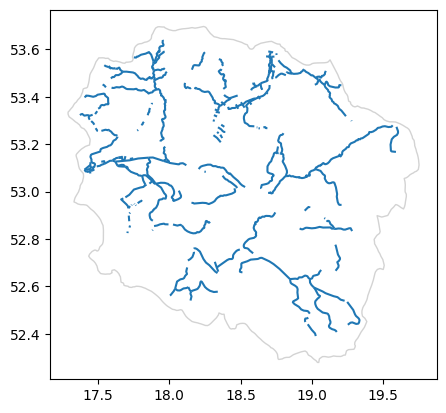

In [36]:
k_p = pl_adm1[pl_adm1['NAME_1'] == 'Kuyavian-Pomeranian']
k_p_rivers = pl_water_lines.within(k_p.geometry.iloc[0])
k_p_rivers = pl_water_lines[k_p_rivers]
fig = k_p.plot(color='none', edgecolor='lightgray')
k_p_rivers.plot(ax=fig)

### Pokrywanie się obszarów

In [37]:
print(f"Does polygon1 cover polygon2: {polygon1.covers(polygon2)} \nShould be True\n")
print(f"Does polygon1 cover polygon3: {polygon1.covers(polygon3)} \nShould be True\n")
print(f"Does polygon1 cover polygon4: {polygon1.covers(polygon4)} \nShould be False\n")
print(f"Does polygon1 cover polygon5: {polygon1.covers(polygon5)} \nShould be False\n")
print(f"Does polygon1 cover polygon6: {polygon1.covers(polygon6)} \nShould be False\n")
print(f"Does polygon1 cover polygon7: {polygon1.covers(polygon7)} \nShould be False\n")
print(f"Does polygon1 cover polygon8: {polygon1.covers(polygon8)} \nShould be False\n")
polygon1_gfd.covers(test_polygon_gfd)

Does polygon1 cover polygon2: True 
Should be True

Does polygon1 cover polygon3: True 
Should be True

Does polygon1 cover polygon4: False 
Should be False

Does polygon1 cover polygon5: False 
Should be False

Does polygon1 cover polygon6: False 
Should be False

Does polygon1 cover polygon7: False 
Should be False

Does polygon1 cover polygon8: False 
Should be False



0     True
1     True
2    False
3    False
4    False
5    False
6    False
dtype: bool

In [38]:
print(f"Is polygon1 covered by polygon2: {polygon1.covered_by(polygon2)} \nShould be True\n")
print(f"Is polygon1 covered by polygon3: {polygon1.covered_by(polygon3)} \nShould be False\n")
print(f"Is polygon1 covered by polygon4: {polygon1.covered_by(polygon4)} \nShould be True\n")
print(f"Is polygon1 covered by polygon5: {polygon1.covered_by(polygon5)} \nShould be False\n")
print(f"Is polygon1 covered by polygon6: {polygon1.covered_by(polygon6)} \nShould be False\n")
print(f"Is polygon1 covered by polygon7: {polygon1.covered_by(polygon7)} \nShould be False\n")
print(f"Is polygon1 covered by polygon8: {polygon1.covered_by(polygon8)} \nShould be False\n")
polygon1_gfd.covered_by(test_polygon_gfd)

Is polygon1 covered by polygon2: True 
Should be True

Is polygon1 covered by polygon3: False 
Should be False

Is polygon1 covered by polygon4: True 
Should be True

Is polygon1 covered by polygon5: False 
Should be False

Is polygon1 covered by polygon6: False 
Should be False

Is polygon1 covered by polygon7: False 
Should be False

Is polygon1 covered by polygon8: False 
Should be False



0     True
1    False
2     True
3    False
4    False
5    False
6    False
dtype: bool

### Dotykanie obszarów

In [39]:
print(f"Is polygon1 touching polygon2: {polygon1.touches(polygon2)} \nShould be False\n")
print(f"Is polygon1 touching polygon3: {polygon1.touches(polygon3)} \nShould be False\n")
print(f"Is polygon1 touching polygon4: {polygon1.touches(polygon4)} \nShould be False\n")
print(f"Is polygon1 touching polygon5: {polygon1.touches(polygon5)} \nShould be False\n")
print(f"Is polygon1 touching polygon6: {polygon1.touches(polygon6)} \nShould be True\n")
print(f"Is polygon1 touching polygon7: {polygon1.touches(polygon7)} \nShould be True\n")
print(f"Is polygon1 touching polygon8: {polygon1.touches(polygon8)} \nShould be False\n")
polygon1_gfd.touches(test_polygon_gfd)

Is polygon1 touching polygon2: False 
Should be False

Is polygon1 touching polygon3: False 
Should be False

Is polygon1 touching polygon4: False 
Should be False

Is polygon1 touching polygon5: False 
Should be False

Is polygon1 touching polygon6: True 
Should be True

Is polygon1 touching polygon7: True 
Should be True

Is polygon1 touching polygon8: False 
Should be False



0    False
1    False
2    False
3    False
4     True
5     True
6    False
dtype: bool

### Brak punktów wspólnych między obszarami

In [40]:
print(f"Are polygon1 and polygon2 disjoint: {polygon1.disjoint(polygon2)} \nShould be False\n")
print(f"Are polygon1 and polygon3 disjoint: {polygon1.disjoint(polygon3)} \nShould be False\n")
print(f"Are polygon1 and polygon4 disjoint: {polygon1.disjoint(polygon4)} \nShould be False\n")
print(f"Are polygon1 and polygon5 disjoint: {polygon1.disjoint(polygon5)} \nShould be False\n")
print(f"Are polygon1 and polygon6 disjoint: {polygon1.disjoint(polygon6)} \nShould be False\n")
print(f"Are polygon1 and polygon7 disjoint: {polygon1.disjoint(polygon7)} \nShould be False\n")
print(f"Are polygon1 and polygon8 disjoint: {polygon1.disjoint(polygon8)} \nShould be True\n")
polygon1_gfd.disjoint(test_polygon_gfd)

Are polygon1 and polygon2 disjoint: False 
Should be False

Are polygon1 and polygon3 disjoint: False 
Should be False

Are polygon1 and polygon4 disjoint: False 
Should be False

Are polygon1 and polygon5 disjoint: False 
Should be False

Are polygon1 and polygon6 disjoint: False 
Should be False

Are polygon1 and polygon7 disjoint: False 
Should be False

Are polygon1 and polygon8 disjoint: True 
Should be True



0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

## Analiza przestrzenna

### Odległość między geometriami

In [41]:
polygon = Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])
point_in = Point(1, 1) # 0
point_on = Point(2, 1) # 0
point_out1 = Point(3, 1) # 1
point_out2 = Point(3, 3) # sqrt(2)

print(f"Distance from polygon to point_in: {point_in.distance(polygon)} \nShould be 0\n")
print(f"Distance from polygon to point_on: {point_on.distance(polygon)} \nShould be 0\n")
print(f"Distance from polygon to point_out1: {point_out1.distance(polygon)} \nShould be 1\n")
print(f"Distance from polygon to point_out2: {point_out2.distance(polygon)} \nShould be 1.41\n")

Distance from polygon to point_in: 0.0 
Should be 0

Distance from polygon to point_on: 0.0 
Should be 0

Distance from polygon to point_out1: 1.0 
Should be 1

Distance from polygon to point_out2: 1.4142135623730951 
Should be 1.41



Wyznaczenie odległości od miejscowości Tleń do każdego województwa w kilometrach

In [42]:
tlen = pl_gazz[pl_gazz['NAME'] == 'Tlen']

tlen = tlen.to_crs(epsg=6933)
pl_adm1_km = pl_adm1.to_crs(epsg=6933)

distances = pl_adm1_km.distance(tlen.geometry.iloc[0]) / 1000
pl_adm1_km['distance_to_Tlen'] = distances
pl_adm1_km[['VARNAME_1', 'distance_to_Tlen']]

,VARNAME_1,distance_to_Tlen
0,Lódzkie,127.567431
1,Swietokrzyskie,257.016080
2,Wielkopolskie,84.974702
3,Kujawsko-Pomorskie,0.000000
4,Malopolskie,283.775493
5,Dolnoslaskie,176.568580
6,Lubelskie,361.355250
7,Lubuskie,217.345848
8,Mazowieckie,127.594482
9,Opolskie,195.115172


Ponieważ Tleń znajduje się w województwie kujawsko-pomorskim odległość do niego wynosi 0.

### Długość linii

In [43]:
line1 = LineString([(0, 0), (1, 0)]) # 1
line2 = LineString([(0, 0), (2, 0), (2, 2), (0, 2)]) # 6
line3 = LineString([(0, 0), (1, 1)]) # 1.41

print(f"Length of line1: {line1.length} \nShould be 1\n")
print(f"Length of line2: {line2.length} \nShould be 8\n")
print(f"Length of line3: {line3.length} \nShould be 1.41\n")

Length of line1: 1.0 
Should be 1

Length of line2: 6.0 
Should be 8

Length of line3: 1.4142135623730951 
Should be 1.41



In [44]:
pl_railroads_km = pl_railroads.to_crs(epsg=6933)
lengths = pl_railroads_km.length / 1000
print(f"Długość wszystkich linii kolejowych: {sum(lengths)}")

Długość wszystkich linii kolejowych: 26447.691599755082


### Pole powierzchni

In [45]:
polygon = Polygon([(0, 0), (2, 0), (2, 2), (0, 2)]) # 4

print(f"Area of a polygon: {polygon.area} \nShould be 4\n")

Area of a polygon: 4.0 
Should be 4



Porównanie sum pól powierzchni kraju, województw oraz powiatów

In [46]:
pl_adm0_km = pl_adm0.to_crs(epsg=6933)
pl_adm1_km = pl_adm1.to_crs(epsg=6933)
pl_adm2_km = pl_adm2.to_crs(epsg=6933)

areas_country = pl_adm0_km.area / 1000**2
areas_country = sum(areas_country)
areas_voivodeship = pl_adm1_km.area / 1000**2
areas_voivodeship = sum(areas_voivodeship)
areas_counties = pl_adm2_km.area / 1000**2
areas_counties = sum(areas_counties)

print(f"Pole powierzchni kraju: {areas_country}")
print(f"Pole powierzchni województw: {areas_voivodeship}")
print(f"Pole powierzchni powiatów: {areas_counties}")

Pole powierzchni kraju: 312152.4981005015
Pole powierzchni województw: 312152.49810050364
Pole powierzchni powiatów: 312152.49810050306


Jak widać wszystkie pola są bardzo podobne do siebie i ich wartość nie różni się znacząco.

### Bufor

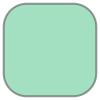

In [47]:
polygon1.buffer(1)

Miejscowowści w odległości kilometra od jeziora Łebsko

In [48]:
towns = pl_gazz[pl_gazz['F_CLASS'] == 'P']
lebsko = pl_water_areas[pl_water_areas['NAME'] == 'JEZIORO LEBSKO']

towns = towns.to_crs(epsg=6933)
lebsko = lebsko.to_crs(epsg=6933)

towns_near = towns.intersects(lebsko.iloc[0].geometry.buffer(1000))
towns_near.value_counts()

False    56081
True         2
Name: count, dtype: int64

### Przecięcie dwóch obszarów

In [49]:
print(f"Intersection of polygon2 with the polygon1: {polygon1.intersection(polygon2)} \nShould be Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])\n")
print(f"Intersection of polygon3 with the polygon1: {polygon1.intersection(polygon3)} \nShould be Polygon([(0.5, 0.5), (1.5, 0.5), (1.5, 1.5), (0.5, 1.5)])\n")
print(f"Intersection of polygon4 with the polygon1: {polygon1.intersection(polygon4)} \nShould be Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])\n")
print(f"Intersection of polygon5 with the polygon1: {polygon1.intersection(polygon5)} \nShould be Polygon([(1, 1), (2, 1), (2, 2), (1, 2)])\n")
print(f"Intersection of polygon6 with the polygon1: {polygon1.intersection(polygon6)} \nShould be LineString([(2, 2), (0, 2)])\n")
print(f"Intersection of polygon7 with the polygon1: {polygon1.intersection(polygon7)} \nShould be Point(2, 2)\n")
print(f"Intersection of polygon8 with the polygon1: {polygon1.intersection(polygon8)} \nShould be Empty\n")
polygon1_gfd.intersection(test_polygon_gfd)

Intersection of polygon2 with the polygon1: POLYGON ((0 0, 0 2, 2 2, 2 0, 0 0)) 
Should be Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])

Intersection of polygon3 with the polygon1: POLYGON ((0.5 1.5, 1.5 1.5, 1.5 0.5, 0.5 0.5, 0.5 1.5)) 
Should be Polygon([(0.5, 0.5), (1.5, 0.5), (1.5, 1.5), (0.5, 1.5)])

Intersection of polygon4 with the polygon1: POLYGON ((0 2, 2 2, 2 0, 0 0, 0 2)) 
Should be Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])

Intersection of polygon5 with the polygon1: POLYGON ((2 2, 2 1, 1 1, 1 2, 2 2)) 
Should be Polygon([(1, 1), (2, 1), (2, 2), (1, 2)])

Intersection of polygon6 with the polygon1: LINESTRING (2 2, 0 2) 
Should be LineString([(2, 2), (0, 2)])

Intersection of polygon7 with the polygon1: POINT (2 2) 
Should be Point(2, 2)

Intersection of polygon8 with the polygon1: POLYGON EMPTY 
Should be Empty



0    POLYGON ((0.00000 0.00000, 0.00000 2.00000, 2....
1    POLYGON ((0.50000 1.50000, 1.50000 1.50000, 1....
2    POLYGON ((0.00000 2.00000, 2.00000 2.00000, 2....
3    POLYGON ((2.00000 2.00000, 2.00000 1.00000, 1....
4        LINESTRING (2.00000 2.00000, 0.00000 2.00000)
5                              POINT (2.00000 2.00000)
6                                        POLYGON EMPTY
dtype: geometry

### Unia

In [50]:
print(f"Union of polygon2 and polygon1: {polygon1.union(polygon2)} \nShould be Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])\n")
print(f"Union of polygon3 and polygon1: {polygon1.union(polygon3)} \nShould be Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])\n")
print(f"Union of polygon4 and polygon1: {polygon1.union(polygon4)} \nShould be Polygon([(-1, -1), (3, -1), (3, 3), (-1, 3)])\n")
print(f"Union of polygon5 and polygon1: {polygon1.union(polygon5)} \nShould be Polygon([(0, 0), (0, 2), (1, 2), (1, 3), (3, 3), (3, 1), (2, 1), (2, 0)])\n")
print(f"Union of polygon6 and polygon1: {polygon1.union(polygon6)} \nShould be Polygon([(0, 0), (0, 2), (0, 4), (2, 4), (2, 2), (2, 0)])\n")
print(f"Union of polygon7 and polygon1: {polygon1.union(polygon7)} \nShould be MultiPolygon([Polygon([(0, 0), (2, 0), (2, 2), (0, 2)]), Polygon([(2, 2), (3, 2), (3, 3), (2, 3)])])\n")
print(f"Union of polygon8 and polygon1: {polygon1.union(polygon8)} \nShould be MultiPolygon([Polygon([(0, 0), (2, 0), (2, 2), (0, 2)]), Polygon([(3, 3), (5, 3), (5, 5), (3, 5)])])\n")
polygon1_gfd.union(test_polygon_gfd)

Union of polygon2 and polygon1: POLYGON ((0 0, 0 2, 2 2, 2 0, 0 0)) 
Should be Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])

Union of polygon3 and polygon1: POLYGON ((0 2, 2 2, 2 0, 0 0, 0 2)) 
Should be Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])

Union of polygon4 and polygon1: POLYGON ((-1 3, 3 3, 3 -1, -1 -1, -1 3)) 
Should be Polygon([(-1, -1), (3, -1), (3, 3), (-1, 3)])

Union of polygon5 and polygon1: POLYGON ((2 0, 0 0, 0 2, 1 2, 1 3, 3 3, 3 1, 2 1, 2 0)) 
Should be Polygon([(0, 0), (0, 2), (1, 2), (1, 3), (3, 3), (3, 1), (2, 1), (2, 0)])

Union of polygon6 and polygon1: POLYGON ((2 0, 0 0, 0 2, 0 4, 2 4, 2 2, 2 0)) 
Should be Polygon([(0, 0), (0, 2), (0, 4), (2, 4), (2, 2), (2, 0)])

Union of polygon7 and polygon1: MULTIPOLYGON (((2 0, 0 0, 0 2, 2 2, 2 0)), ((2 3, 3 3, 3 2, 2 2, 2 3))) 
Should be MultiPolygon([Polygon([(0, 0), (2, 0), (2, 2), (0, 2)]), Polygon([(2, 2), (3, 2), (3, 3), (2, 3)])])

Union of polygon8 and polygon1: MULTIPOLYGON (((0 0, 2 0, 2 2, 0 2, 0 0)), ((3 3, 5 3,

0    POLYGON ((0.00000 0.00000, 0.00000 2.00000, 2....
1    POLYGON ((0.00000 2.00000, 2.00000 2.00000, 2....
2    POLYGON ((-1.00000 3.00000, 3.00000 3.00000, 3...
3    POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0....
4    POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0....
5    MULTIPOLYGON (((2.00000 0.00000, 0.00000 0.000...
6    MULTIPOLYGON (((0.00000 0.00000, 2.00000 0.000...
dtype: geometry

### Różnica

In [51]:
print(f"Difference of polygon1 and polygon2: {polygon1.difference(polygon2)} \nShould be Empty\n")
print(f"Difference of polygon1 and polygon3: {polygon1.difference(polygon3)} \nShould be Polygon([(0, 0), (2, 0), (2, 2), (0, 2)], [[(0.5, 0.5), (1.5, 0.5), (1.5, 1.5), (0.5, 1.5)]])\n")
print(f"Difference of polygon1 and polygon4: {polygon1.difference(polygon4)} \nShould be Empty\n")
print(f"Difference of polygon1 and polygon5: {polygon1.difference(polygon5)} \nShould be Polygon([(0, 0), (0, 2), (1, 2), (1, 1), (2, 1), (2, 0)])\n")
print(f"Difference of polygon1 and polygon6: {polygon1.difference(polygon6)} \nShould be Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])\n")
print(f"Difference of polygon1 and polygon7: {polygon1.difference(polygon7)} \nShould be Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])\n")
print(f"Difference of polygon1 and polygon8: {polygon1.difference(polygon8)} \nShould be Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])\n")
polygon1_gfd.difference(test_polygon_gfd)

Difference of polygon1 and polygon2: POLYGON EMPTY 
Should be Empty

Difference of polygon1 and polygon3: POLYGON ((0 2, 2 2, 2 0, 0 0, 0 2), (1.5 0.5, 1.5 1.5, 0.5 1.5, 0.5 0.5, 1.5 0.5)) 
Should be Polygon([(0, 0), (2, 0), (2, 2), (0, 2)], [[(0.5, 0.5), (1.5, 0.5), (1.5, 1.5), (0.5, 1.5)]])

Difference of polygon1 and polygon4: POLYGON EMPTY 
Should be Empty

Difference of polygon1 and polygon5: POLYGON ((2 0, 0 0, 0 2, 1 2, 1 1, 2 1, 2 0)) 
Should be Polygon([(0, 0), (0, 2), (1, 2), (1, 1), (2, 1), (2, 0)])

Difference of polygon1 and polygon6: POLYGON ((2 0, 0 0, 0 2, 2 2, 2 0)) 
Should be Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])

Difference of polygon1 and polygon7: POLYGON ((2 0, 0 0, 0 2, 2 2, 2 0)) 
Should be Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])

Difference of polygon1 and polygon8: POLYGON ((0 2, 2 2, 2 0, 0 0, 0 2)) 
Should be Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])



0                                        POLYGON EMPTY
1    POLYGON ((0.00000 2.00000, 2.00000 2.00000, 2....
2                                        POLYGON EMPTY
3    POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0....
4    POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0....
5    POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0....
6    POLYGON ((0.00000 2.00000, 2.00000 2.00000, 2....
dtype: geometry

### Różnica symetryczna

In [52]:
print(f"Symmetric difference of polygon2 and polygon1: {polygon1.symmetric_difference(polygon2)} \nShould be Empty\n")
print(f"Symmetric difference of polygon3 and polygon1: {polygon1.symmetric_difference(polygon3)} \nShould be Polygon([(0, 0), (2, 0), (2, 2), (0, 2)], [[(0.5, 0.5), (1.5, 0.5), (1.5, 1.5), (0.5, 1.5)]])\n")
print(f"Symmetric difference of polygon4 and polygon1: {polygon1.symmetric_difference(polygon4)} \nShould be Polygon([(-1, -1), (3, -1), (3, 3), (-1, 3)], [[(0, 0), (2, 0), (2, 2), (0, 2)]])\n")
print(f"Symmetric difference of polygon5 and polygon1: {polygon1.symmetric_difference(polygon5)} \nShould be MultiPolygon([Polygon([(0, 0), (0, 2), (1, 2), (1, 1), (2, 1), (2, 0)]), Polygon([(2, 2), (1, 2), (1, 3), (3, 3), (3, 1), (2, 1)])])\n")
print(f"Symmetric difference of polygon6 and polygon1: {polygon1.symmetric_difference(polygon6)} \nShould be Polygon([(0, 0), (0, 2), (0, 4), (2, 4), (2, 2), (2, 0)])\n")
print(f"Symmetric difference of polygon7 and polygon1: {polygon1.symmetric_difference(polygon7)} \nShould be MultiPolygon([Polygon([(0, 0), (2, 0), (2, 2), (0, 2)]), Polygon([(2, 2), (3, 2), (3, 3), (2, 3)])])\n")
print(f"Symmetric difference of polygon8 and polygon1: {polygon1.symmetric_difference(polygon8)} \nShould be MultiPolygon([Polygon([(0, 0), (2, 0), (2, 2), (0, 2)]), Polygon([(3, 3), (5, 3), (5, 5), (3, 5)])])\n")
polygon1_gfd.symmetric_difference(test_polygon_gfd)

Symmetric difference of polygon2 and polygon1: POLYGON EMPTY 
Should be Empty

Symmetric difference of polygon3 and polygon1: POLYGON ((0 2, 2 2, 2 0, 0 0, 0 2), (1.5 0.5, 1.5 1.5, 0.5 1.5, 0.5 0.5, 1.5 0.5)) 
Should be Polygon([(0, 0), (2, 0), (2, 2), (0, 2)], [[(0.5, 0.5), (1.5, 0.5), (1.5, 1.5), (0.5, 1.5)]])

Symmetric difference of polygon4 and polygon1: POLYGON ((-1 3, 3 3, 3 -1, -1 -1, -1 3), (2 0, 2 2, 0 2, 0 0, 2 0)) 
Should be Polygon([(-1, -1), (3, -1), (3, 3), (-1, 3)], [[(0, 0), (2, 0), (2, 2), (0, 2)]])

Symmetric difference of polygon5 and polygon1: MULTIPOLYGON (((2 0, 0 0, 0 2, 1 2, 1 1, 2 1, 2 0)), ((2 2, 1 2, 1 3, 3 3, 3 1, 2 1, 2 2))) 
Should be MultiPolygon([Polygon([(0, 0), (0, 2), (1, 2), (1, 1), (2, 1), (2, 0)]), Polygon([(2, 2), (1, 2), (1, 3), (3, 3), (3, 1), (2, 1)])])

Symmetric difference of polygon6 and polygon1: POLYGON ((2 0, 0 0, 0 2, 0 4, 2 4, 2 2, 2 0)) 
Should be Polygon([(0, 0), (0, 2), (0, 4), (2, 4), (2, 2), (2, 0)])

Symmetric difference of polyg

0                                        POLYGON EMPTY
1    POLYGON ((0.00000 2.00000, 2.00000 2.00000, 2....
2    POLYGON ((-1.00000 3.00000, 3.00000 3.00000, 3...
3    MULTIPOLYGON (((2.00000 0.00000, 0.00000 0.000...
4    POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0....
5    MULTIPOLYGON (((2.00000 0.00000, 0.00000 0.000...
6    MULTIPOLYGON (((0.00000 0.00000, 2.00000 0.000...
dtype: geometry

## Inne

### Spatial join

Połączenie tablicy powiatów z tablicą województw

In [53]:
gpd.sjoin(
    pl_adm2[['VARNAME_2', 'NAME_1', 'geometry']],
    pl_adm1[['VARNAME_1', 'geometry']],
    how='left',
    predicate='intersects'
)

,VARNAME_2,NAME_1,geometry,index_right,VARNAME_1
0,Powiat Lódzki Wschodni,Łódź,"POLYGON ((19.94863 51.69453, 19.95766 51.68640...",0,Lódzkie
1,None,Łódź,"POLYGON ((19.43115 51.63008, 19.39816 51.64681...",0,Lódzkie
2,Powiat Laski,Łódź,"POLYGON ((18.86274 51.29820, 18.86443 51.30588...",0,Lódzkie
3,Powiat Lęczycki,Łódź,"POLYGON ((19.55936 51.99213, 19.54240 51.98181...",0,Lódzkie
3,Powiat Lęczycki,Łódź,"POLYGON ((19.55936 51.99213, 19.54240 51.98181...",2,Wielkopolskie
...,...,...,...,...,...
373,Powiat Szczecinecki,West Pomeranian,"POLYGON ((16.94773 53.58820, 16.92182 53.59652...",11,Pomorskie
374,Stettin|Sztetëno|Stetinum,West Pomeranian,"POLYGON ((14.74024 53.33474, 14.72967 53.33179...",15,Zachodniopomorskie
375,Powiat Wałecki,West Pomeranian,"POLYGON ((16.08435 53.21173, 16.08571 53.22678...",7,Lubuskie
375,Powiat Wałecki,West Pomeranian,"POLYGON ((16.08435 53.21173, 16.08571 53.22678...",2,Wielkopolskie


Połączenie następiło po cesze przecięcia dwóch obszarów, dodana została kolumna z polską nazwą województwa, która była dostępna tylko w tabeli województw.

Można zauważyć, że powiaty graniczące z innymi województwami równieże zostały wdzielone do tych powiatów, ze względu na to jak sprawdzane jest nakładanie, do którego wystarczy jakakolwiek część wspólna obu geometri.

### Unia jednoargumentowa

Unia jednoargumentowa powiatów

MULTIPOLYGON (((15.99491882324213 50.6124725341798, 15.990733146667537 50.612316131591854, 15.990482330322266 50.61516571044933, 15.990336418151912 50.616813659668026, 15.989939689636287 50.6213111877442, 15.996985435485783 50.62157821655285, 15.996587753295842 50.62607574462885, 15.996191024780387 50.6305770874024, 15.995795249939079 50.63507461547863, 15.995491027831974 50.638526916503906, 15.995397567749137 50.6395721435548, 15.99575519561779 50.639583587646484, 16.002447128296012 50.63983917236328, 16.00205039978033 50.64433670043945, 16.00165557861328 50.648834228515625, 16.001258850097656 50.653331756591854, 16.000860214233455 50.657829284668026, 16.000465393066406 50.6623268127442, 15.995228767394963 50.662132263183594, 15.993412971496639 50.662063598632926, 15.993017196655273 50.6665611267091, 15.992733001708928 50.6697731018067, 15.992620468139648 50.67105865478527, 15.992220878601131 50.67555618286144, 15.991825103759766 50.68005371093744, 15.991426467895565 50.68455123901367

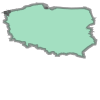

In [54]:
print(pl_adm2.unary_union)
pl_adm2.unary_union

Po utworzeniu unii jednoargumentowej wszystkie geometrie w tabeli są złączane w jedną geometrie.

# Zbadanie limitów pamięci RAM

Utworzenie bardzo dużej tabeli i zapisanie jej na dysku

In [8]:
pl_adm2_large = pl_adm2.copy()
print(len(pl_adm2_large))
for _ in range(15):
    pl_adm2_large = pd.concat([pl_adm2_large, pl_adm2_large])
pl_adm2_large.to_file("large/pl_adm2.shp")
len(pl_adm2_large)

376


RuntimeError: GDAL Error: Failed to write shape object. The maximum file size of 4294964640 has been reached. The current record of size 2904 cannot be added.. Failed to write record: <fiona.model.Feature object at 0x7f4e20ef0730>

Niestety format w jakim zapisywane są pliki ma ograniczenie rozmiarów do 4 GB. Inne aplikacje do obsługi zapytań przestrzennych mogą mieć wyższe ograniczenia lub ich nie mieć. Natomiast realizując zapytania w języku Python przy użyciu biblioteki geopandas jest to z góry narzucone ograczniczenie bez możliwości jego obejścia.

In [14]:
pl_adm2_large = pl_adm2.copy()
print(len(pl_adm2_large))
for _ in range(18):
    pl_adm2_large = pd.concat([pl_adm2_large, pl_adm2_large])
len(pl_adm2_large)

376


: 

Po wygenerowaniu tabeli znacznie przekraczającej pamięć RAM jądro języka Python zwróciło błąd i wymagało zrestartowania. Z doświadczenia z językiem Python przy wczytanie pliku, który przekraczałby pamięć RAM skutkowałoby zwróceniem błędu o niewystarczającej pamięci operacyjnej do wczytania pliku.

# Wnioski

Język Python jak najbardziej nadaje się do wykonywania zapytań dla danych przestrzennych, o ile są to pliki o niedużych rozmiarach. 

Dostępne obiekty w bibliotece shapely pozwalają na reprezentacje dowolnej geometrii, są to:
* Point
* MultiPoint
* LineString
* MultiLineString
* Polygon
* MultiPolygon
Dodatkowo Poligony pozwalają na tworzenie kształtów mających dziury w środku.

Możliwe jest wczytanie oraz zapisywanie tabel do uniwersalnego formatu pozwalającego na korzystanie z danych wygenerowanych przy pomocy różnych aplikacji. Biblioteka geopandas jest oparta na bardzo popularnej bibliotece pandas w wyniku czego korzystanie z niej jest bardzo intuicyjne dla wielu osób. Tabele składają się z kolumny 'geometry' oraz dowolnych innych wierszy. Wszystkie operacje przestrzenne oraz wizualizacje skupiają się właśnie na wspomnianej kolumnie 'geometry'.

W bibliotece dostępne są wszystkie podstawowe operacje przestrzenne, dla których przykłady znajdują się powyżej, możliwość łączenia tabeli na podstawie geometrii w nich występujących oraz wiele innych operacji. Każda sprawdzona działała prawidłowo oraz pozwalała na zastosowanie jej dla całej tabeli.

Dużym ograniczeniem niestety jest rozmiar tabel, na których można wykonywać operacje. Jak wspomniano w sekcji wyżej biblioteka geopandas pozwala na zapis plików o rozmiarze mniejszym niż 4 GB. Więc po utworzeniu takiej tabeli w celu jej zapisu będzie potrzebne jej podzielenie. Dodatkowo Python nie pozwala wczytywać, a tym samym operować na plikach, których rozmiar jest większy niż dostępna pamięć operacyjna.